<a href="https://colab.research.google.com/github/mehrotrasan16/CS581-CAN-DO-Project/blob/sanketm-dataexploration/code/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Why are we doing this?
* To check for biases
* to understand the data better
* to see if we can add labels ourselves for supervised training
* to see if we can merge the datasets for better understanding of data ( quote Dos 50:50 split and Attack free sets single lable problem.)

* Also hinting that this dataset does not seem tuned for ml applications, since all the datasets are on different timestamp axes(differently collected) 
* So merging requires tossing the timestamp field i.e. temporality of the dataset
* but from our below analysis and reading and discussion, we cannot tell that timestamp is especially helpful and contrary - out lstm experiments without the timestamp field show better accuracy.


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fuzzy Attack Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/project-data/Fuzzy_attack_dataset.csv')
df

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,0.000000,544,0,8,41,197,38,85,106,103,2,93
1,0.000868,1201,0,8,94,81,207,183,76,153,170,151
2,0.001212,688,0,5,58,255,0,7,44,0,0,0
3,0.001452,357,0,8,0,8,128,2,0,0,12,134
4,0.001782,544,0,8,212,166,227,169,35,170,211,31
...,...,...,...,...,...,...,...,...,...,...,...,...
591985,347.330224,339,0,8,0,161,32,255,0,255,32,223
591986,347.330461,544,0,8,192,3,245,3,12,0,71,16
591987,347.330678,1440,0,8,166,32,82,109,167,238,124,226
591988,347.331050,1442,0,8,238,34,248,11,91,131,153,171


## Checking counts and distributions of values

In [ ]:
# df['ID'] = df.ID.apply(lambda x: int(x, 16))

In [ ]:
df

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,0.000000,544,0,8,41,197,38,85,106,103,2,93
1,0.000868,1201,0,8,94,81,207,183,76,153,170,151
2,0.001212,688,0,5,58,255,0,7,44,0,0,0
3,0.001452,357,0,8,0,8,128,2,0,0,12,134
4,0.001782,544,0,8,212,166,227,169,35,170,211,31
...,...,...,...,...,...,...,...,...,...,...,...,...
591985,347.330224,339,0,8,0,161,32,255,0,255,32,223
591986,347.330461,544,0,8,192,3,245,3,12,0,71,16
591987,347.330678,1440,0,8,166,32,82,109,167,238,124,226
591988,347.331050,1442,0,8,238,34,248,11,91,131,153,171


In [ ]:
df.groupby('CAN ID').count()

,Timestamp,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
CAN ID,,,,,,,,,,,
24,3051,3051,3051,3051,3051,3051,3051,3051,3051,3051,3051
52,173,173,173,173,173,173,173,173,173,173,173
66,158,158,158,158,158,158,158,158,158,158,158
67,161,161,161,161,161,161,161,161,161,161,161
68,162,162,162,162,162,162,162,162,162,162,162
80,731,731,731,731,731,731,731,731,731,731,731
128,16395,16395,16395,16395,16395,16395,16395,16395,16395,16395,16395
129,16627,16627,16627,16627,16627,16627,16627,16627,16627,16627,16627
160,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638


In [ ]:
idcounts = df.groupby('CAN ID').count()['Timestamp']
type(idcounts)

pandas.core.series.Series

In [ ]:
idcounts

CAN ID
24       3051
52        173
66        158
67        161
68        162
80        731
128     16395
129     16627
160      1638
161      1560
272      5091
288       698
339     42704
356     41590
357     14442
399     16568
497     36333
544     41538
608     16556
672     16151
688     13620
704     31645
790     19758
809     15886
848      7968
880     16016
898      8152
1087    16684
1088    15831
1200    35834
1201    36043
1264     7857
1265     1535
1266     8469
1296     1641
1303      761
1306      782
1349    15293
1415     1663
1435     1537
1440    29891
1442    29368
1508     1330
1520      688
1680     1411
Name: Timestamp, dtype: int64

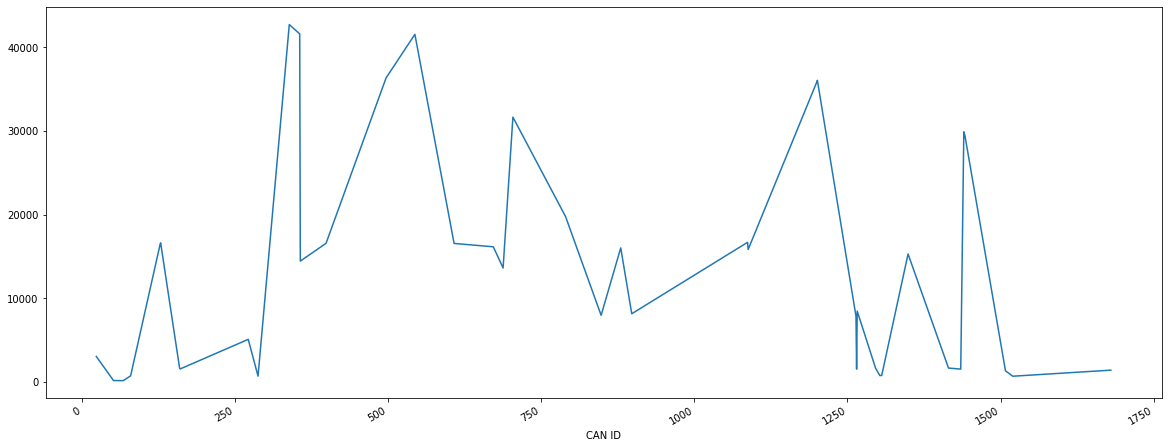

In [ ]:
idcounts.plot()
fig = plt.gcf()
fig.set_size_inches(20,8)
fig.autofmt_xdate()

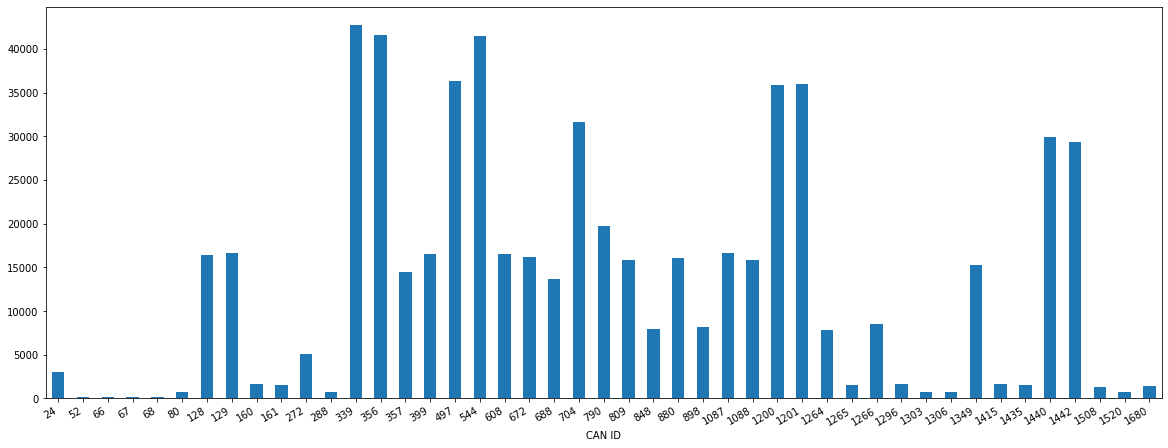

In [ ]:
idcounts.plot.bar()
fig = plt.gcf()
fig.set_size_inches(20,8)
fig.autofmt_xdate()

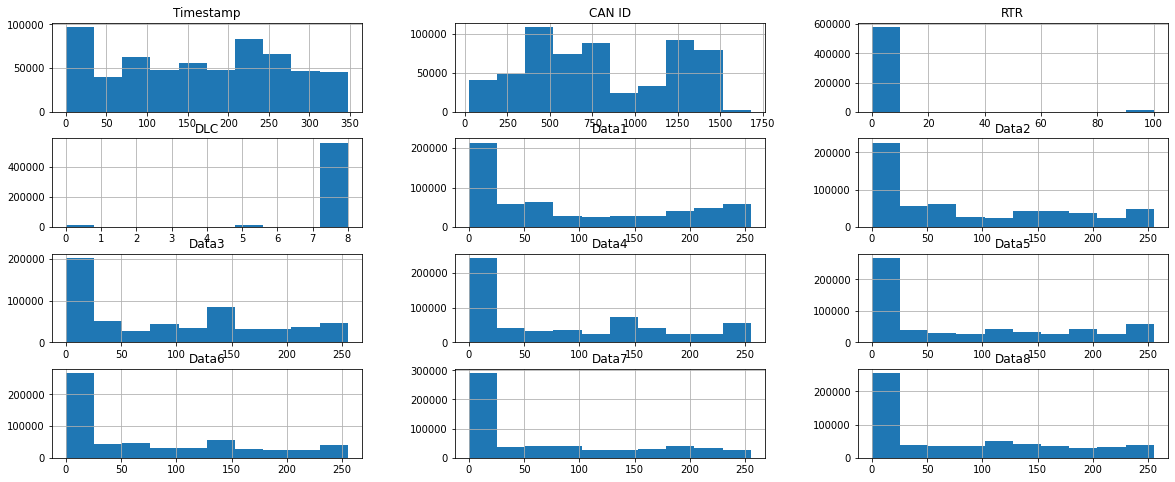

In [ ]:
df.hist()
fig = plt.gcf()
fig.set_size_inches(20,8)

## Checking unique values( possible values of datapoints)

In [ ]:
devids = df['CAN ID'].unique()
len(devids),devids

(45, array([ 544, 1201,  688,  357, 1200, 1264,  790,  809,  128,  129,  399,
         608,  672,  356, 1349, 1440,  339,  497, 1087,  272,  880, 1088,
         848,  898, 1266, 1296, 1442,  704,  160,  161, 1435,   66,   67,
          68, 1265, 1306, 1680, 1415, 1508,   24,   80,   52, 1520, 1303,
         288]))

In [ ]:
df['RTR'].unique()

array([  0, 100])

In [ ]:
df['DLC'].unique()

array([8, 5, 0, 4, 3, 2])

In [ ]:
df

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,0.000000,544,0,8,41,197,38,85,106,103,2,93
1,0.000868,1201,0,8,94,81,207,183,76,153,170,151
2,0.001212,688,0,5,58,255,0,7,44,0,0,0
3,0.001452,357,0,8,0,8,128,2,0,0,12,134
4,0.001782,544,0,8,212,166,227,169,35,170,211,31
...,...,...,...,...,...,...,...,...,...,...,...,...
591985,347.330224,339,0,8,0,161,32,255,0,255,32,223
591986,347.330461,544,0,8,192,3,245,3,12,0,71,16
591987,347.330678,1440,0,8,166,32,82,109,167,238,124,226
591988,347.331050,1442,0,8,238,34,248,11,91,131,153,171


# DoS Attack Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/project-data/DoS_attack_dataset.csv')
df = df.set_index('Timestamp')
# df.index = df.Timestamp
df

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
0.000000,0,0,8,0,0,0,0,0,0,0,0
0.000271,128,0,8,0,23,220,9,22,17,22,187
0.000495,0,0,8,0,0,0,0,0,0,0,0
0.000736,129,0,8,64,132,135,0,0,0,0,107
0.000983,0,0,8,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
306.295869,0,0,8,0,0,0,0,0,0,0,0
306.296118,129,0,8,64,132,137,0,0,0,0,240
306.296365,0,0,8,0,0,0,0,0,0,0,0


## Checking counts and distributions of values

In [ ]:
df

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
0.000000,0,0,8,0,0,0,0,0,0,0,0
0.000271,128,0,8,0,23,220,9,22,17,22,187
0.000495,0,0,8,0,0,0,0,0,0,0,0
0.000736,129,0,8,64,132,135,0,0,0,0,107
0.000983,0,0,8,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
306.295869,0,0,8,0,0,0,0,0,0,0,0
306.296118,129,0,8,64,132,137,0,0,0,0,240
306.296365,0,0,8,0,0,0,0,0,0,0,0


In [ ]:
df.groupby('CAN ID').count()

,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
CAN ID,,,,,,,,,,
0,335624,335624,335624,335624,335624,335624,335624,335624,335624,335624
24,820,820,820,820,820,820,820,820,820,820
52,163,163,163,163,163,163,163,163,163,163
66,163,163,163,163,163,163,163,163,163,163
67,158,158,158,158,158,158,158,158,158,158
68,151,151,151,151,151,151,151,151,151,151
80,664,664,664,664,664,664,664,664,664,664
128,15612,15612,15612,15612,15612,15612,15612,15612,15612,15612
129,15700,15700,15700,15700,15700,15700,15700,15700,15700,15700


In [ ]:
idcounts = df.groupby('CAN ID').count()['RTR']
type(idcounts)

pandas.core.series.Series

In [ ]:
idcounts

CAN ID
0       335624
24         820
52         163
66         163
67         158
68         151
80         664
128      15612
129      15700
160       1523
161       1551
272       1552
288        685
339      18401
356      17271
357      15792
399      15849
497      10858
544      18274
608      15444
672      15355
688      14001
704       4343
790      15520
809      15383
848       7764
880      15349
898       7789
1087     15041
1088     15093
1200     10690
1201     10472
1264      1184
1265       453
1266       840
1296      1585
1303       758
1306       329
1349      8493
1415      1548
1435      1485
1440      2968
1442      2602
1508       570
1520       330
1680       379
Name: RTR, dtype: int64

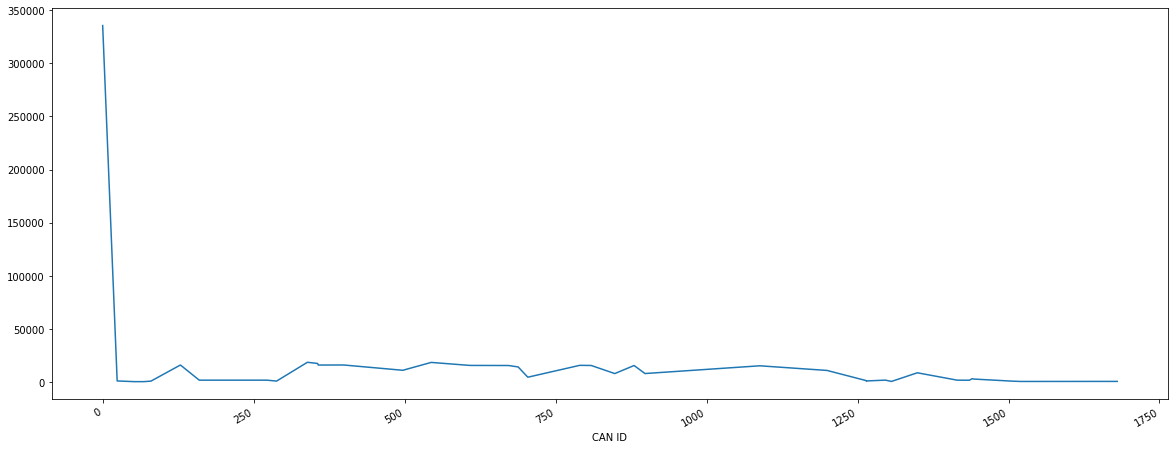

In [ ]:
idcounts.plot()
fig = plt.gcf()
fig.set_size_inches(20,8)
fig.autofmt_xdate()

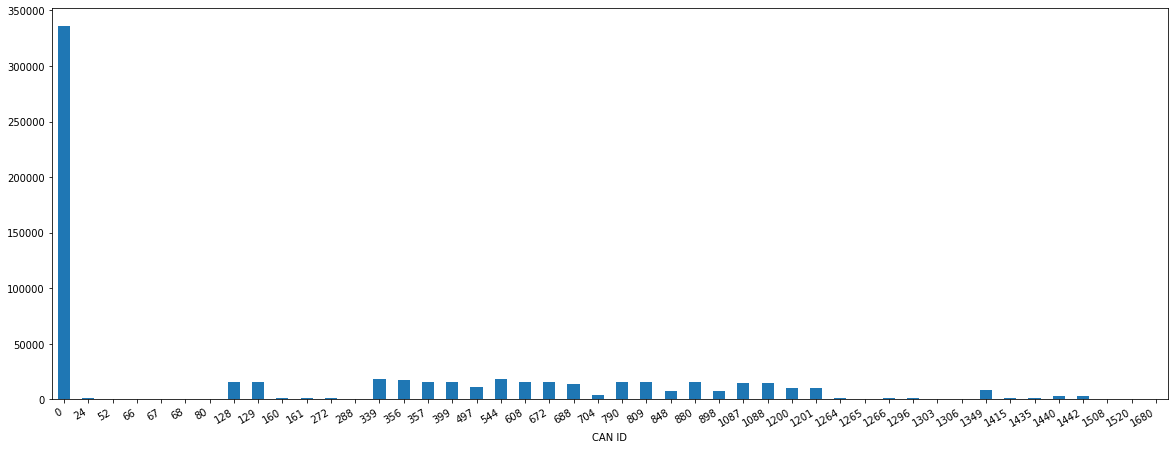

In [ ]:
idcounts.plot.bar()
fig = plt.gcf()
fig.set_size_inches(20,8)
fig.autofmt_xdate()

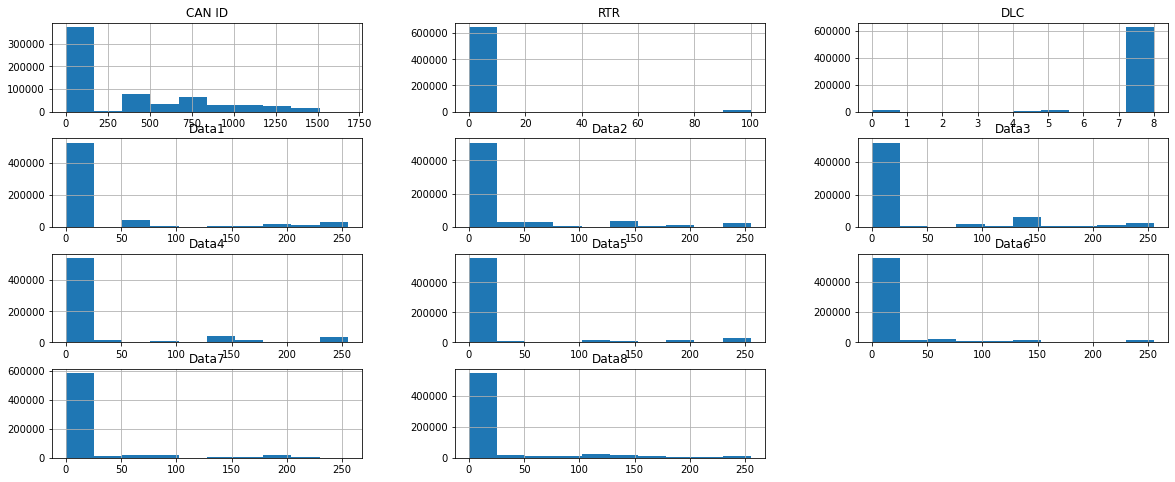

In [ ]:
df.hist()
fig = plt.gcf()
fig.set_size_inches(20,8)

## Checking unique values( possible values of datapoints)

In [ ]:
devids = df['CAN ID'].unique()
len(devids),devids

(46, array([   0,  128,  129,  357,  399,  672,  688,  790,  809,  880,  898,
        1087, 1088,  339,  544, 1200, 1201,  356, 1349, 1442,  608,  848,
         497, 1435, 1440, 1508,  272,  160,  161,  704, 1415,   80, 1296,
         288, 1303, 1520, 1266,   67,   52,   24, 1680, 1264, 1265, 1306,
          66,   68]))

In [ ]:
df['RTR'].unique()

array([  0, 100])

In [ ]:
df['DLC'].unique()

array([8, 5, 4, 0, 3, 2])

## Exploring Types of frames: Data Frames and Remote Frames

In [ ]:
dataframes = df.loc[df.RTR == 100]
remoteframes = df.loc[df.RTR != 100]

In [ ]:
remoteframes.head()

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
0.000000,0,0,8,0,0,0,0,0,0,0,0
0.000271,128,0,8,0,23,220,9,22,17,22,187
0.000495,0,0,8,0,0,0,0,0,0,0,0
0.000736,129,0,8,64,132,135,0,0,0,0,107
0.000983,0,0,8,0,0,0,0,0,0,0,0


In [ ]:
remoteframes['RTR'].unique()

array([0])

In [ ]:
dosattackframes = df.loc[df['CAN ID'] == 0]
dosattackframes

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
0.000000,0,0,8,0,0,0,0,0,0,0,0
0.000495,0,0,8,0,0,0,0,0,0,0,0
0.000983,0,0,8,0,0,0,0,0,0,0,0
0.001484,0,0,8,0,0,0,0,0,0,0,0
0.001984,0,0,8,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
306.294894,0,0,8,0,0,0,0,0,0,0,0
306.295372,0,0,8,0,0,0,0,0,0,0,0
306.295869,0,0,8,0,0,0,0,0,0,0,0


# Attack-Free Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/project-data/Attack_free_dataset.csv')
df = df.set_index('Timestamp')
# df.index = df.Timestamp
df

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
0.000000,790,0,8,5,32,234,10,32,26,0,127
0.000224,809,0,8,215,167,127,140,17,47,0,16
0.000462,128,0,8,0,23,234,10,32,26,32,67
0.000704,129,0,8,127,132,96,0,0,0,0,83
0.000878,288,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1037.589395,68,0,8,0,0,0,255,111,0,0,0
1037.589628,357,0,8,17,232,127,0,0,0,12,138
1037.589812,688,0,5,35,0,0,7,172,0,0,0


## Checking counts and distributions of values

In [ ]:
df

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
0.000000,790,0,8,5,32,234,10,32,26,0,127
0.000224,809,0,8,215,167,127,140,17,47,0,16
0.000462,128,0,8,0,23,234,10,32,26,32,67
0.000704,129,0,8,127,132,96,0,0,0,0,83
0.000878,288,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1037.589395,68,0,8,0,0,0,255,111,0,0,0
1037.589628,357,0,8,17,232,127,0,0,0,12,138
1037.589812,688,0,5,35,0,0,7,172,0,0,0


In [ ]:
df.groupby('CAN ID').count()

,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
CAN ID,,,,,,,,,,
24,5191,5191,5191,5191,5191,5191,5191,5191,5191,5191
52,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
66,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
67,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
68,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
80,5191,5191,5191,5191,5191,5191,5191,5191,5191,5191
128,103759,103759,103759,103759,103759,103759,103759,103759,103759,103759
129,103759,103759,103759,103759,103759,103759,103759,103759,103759,103759
160,10376,10376,10376,10376,10376,10376,10376,10376,10376,10376


In [ ]:
idcounts = df.groupby('CAN ID').count()['RTR']
type(idcounts)

pandas.core.series.Series

In [ ]:
idcounts

CAN ID
24        5191
52        1038
66        1038
67        1038
68        1038
80        5191
128     103759
129     103759
160      10376
161      10376
272      10376
288       5188
339     126997
356     126605
357     103757
399     103759
497      74694
544     126980
608     103759
672     103759
688     103757
704      32792
790     103759
809     103759
848      51877
880     103755
898      51880
1087    103755
1088    103755
1200     74694
1201     74689
1264     51882
1265     10376
1266     51882
1296     10376
1303      5188
1306      5188
1349    103759
1415     10375
1435     10376
1440     23454
1442     23452
1508     10375
1520      5189
1680     10376
Name: RTR, dtype: int64

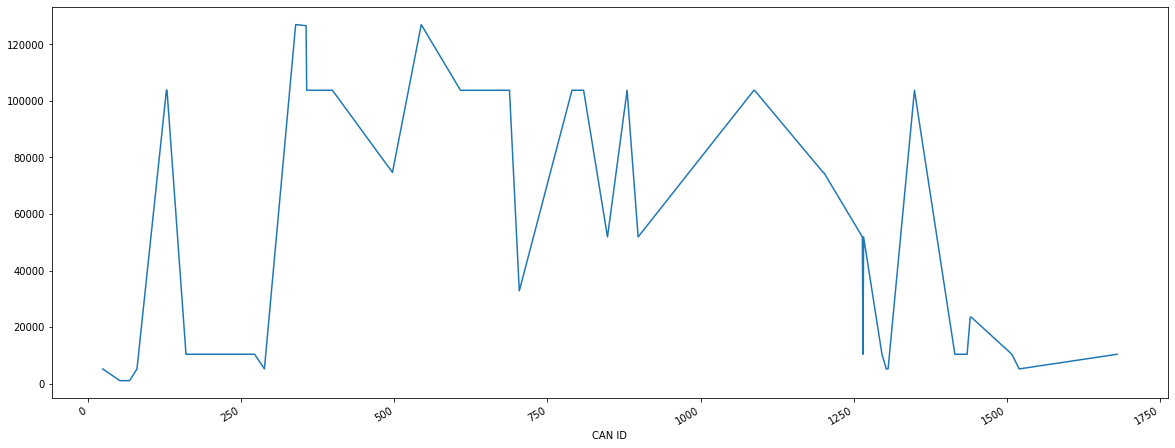

In [ ]:
idcounts.plot()
fig = plt.gcf()
fig.set_size_inches(20,8)
fig.autofmt_xdate()

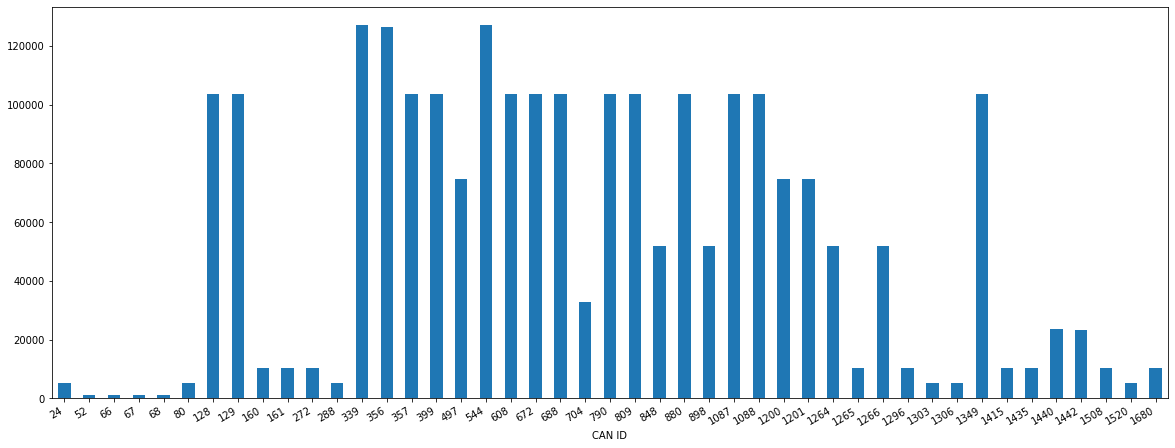

In [ ]:
idcounts.plot.bar()
fig = plt.gcf()
fig.set_size_inches(20,8)
fig.autofmt_xdate()

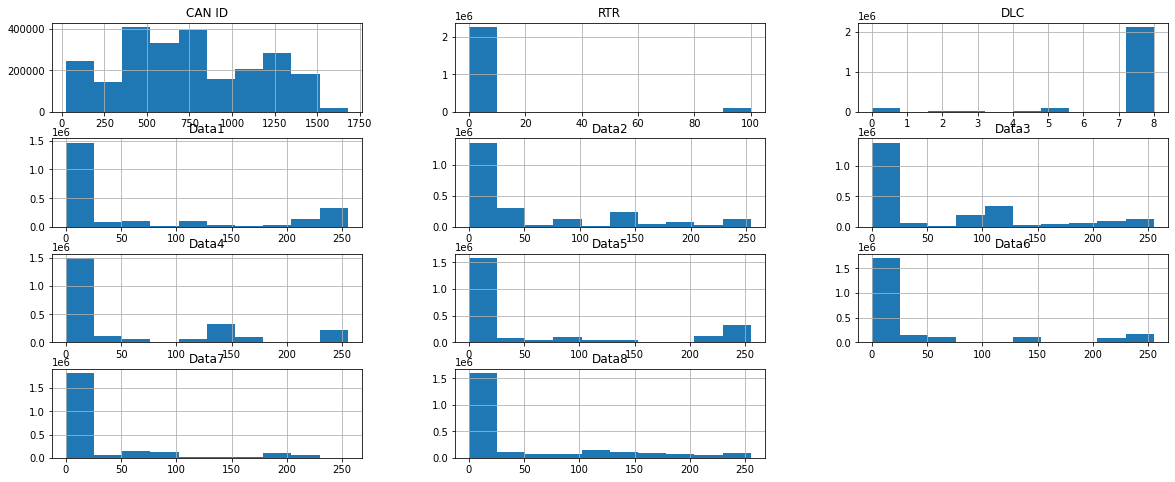

In [ ]:
df.hist()
fig = plt.gcf()
fig.set_size_inches(20,8)

## Checking unique values( possible values of datapoints)

In [ ]:
devids = df['CAN ID'].unique()
len(devids),devids

(45, array([ 790,  809,  128,  129,  288,  339,  399,  544,  608,  672,  880,
         898, 1087, 1088, 1303, 1349, 1435,  688,  357, 1201,  356, 1264,
         497, 1296, 1200,  848, 1266, 1440, 1520,  704, 1442,  272, 1415,
          80,  160,  161,   24, 1265, 1680, 1508, 1306,   52,   66,   67,
          68]))

In [ ]:
df['RTR'].unique()

array([  0, 100])

In [ ]:
df['DLC'].unique()

array([8, 4, 0, 5, 2, 3])

## Exploring Types of frames: Data Frames and Remote Frames

In [ ]:
dataframes = df.loc[df.RTR == 100]
remoteframes = df.loc[df.RTR != 100]

In [ ]:
remoteframes.head()

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
0.000000,790,0,8,5,32,234,10,32,26,0,127
0.000224,809,0,8,215,167,127,140,17,47,0,16
0.000462,128,0,8,0,23,234,10,32,26,32,67
0.000704,129,0,8,127,132,96,0,0,0,0,83
0.000878,288,0,4,0,0,0,0,0,0,0,0


In [ ]:
remoteframes['RTR'].unique()

array([0])

In [ ]:
dosattackframes = df.loc[df['CAN ID'] == 0]
dosattackframes

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,


There are no 0x00 frames in this dataset, unlike the DoS dataset, where the attack was orchestrated by flooding the CAN network with packets with the highest priority 0x00. This would bias the arbitration process toward these higher priority spam packets.

In [ ]:
dataframes.head(20)

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
0.001684,339,100,0,0,0,0,0,0,0,0,0
0.012204,356,100,0,0,0,0,0,0,0,0,0
0.022430,497,100,0,0,0,0,0,0,0,0,0
0.032910,544,100,0,0,0,0,0,0,0,0,0
0.043037,704,100,0,0,0,0,0,0,0,0,0
0.053430,1200,100,0,0,0,0,0,0,0,0,0
0.063749,1201,100,0,0,0,0,0,0,0,0,0
0.074054,1440,100,0,0,0,0,0,0,0,0,0
0.084290,1442,100,0,0,0,0,0,0,0,0,0


# Impersonation Attack

In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/project-data/Impersonation_attack_dataset.csv')
df = df.set_index('Timestamp')
# df.index = df.Timestamp
df

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
1.481193e+09,1415,0,8,0,0,0,0,0,0,0,1
1.481193e+09,790,0,8,5,28,106,10,28,19,0,127
1.481193e+09,399,0,8,0,33,28,0,0,67,0,0
1.481193e+09,608,0,8,5,28,0,48,255,147,99,53
1.481193e+09,128,0,8,0,23,106,10,28,19,28,31
...,...,...,...,...,...,...,...,...,...,...,...
1.481193e+09,1508,0,3,0,2,0,0,0,0,0,0
1.481193e+09,339,0,8,0,128,16,255,0,255,160,46
1.481193e+09,357,0,8,14,216,127,0,0,0,3,170


## Checking counts and distributions of values

In [5]:
df

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
1.481193e+09,1415,0,8,0,0,0,0,0,0,0,1
1.481193e+09,790,0,8,5,28,106,10,28,19,0,127
1.481193e+09,399,0,8,0,33,28,0,0,67,0,0
1.481193e+09,608,0,8,5,28,0,48,255,147,99,53
1.481193e+09,128,0,8,0,23,106,10,28,19,28,31
...,...,...,...,...,...,...,...,...,...,...,...
1.481193e+09,1508,0,3,0,2,0,0,0,0,0,0
1.481193e+09,339,0,8,0,128,16,255,0,255,160,46
1.481193e+09,357,0,8,14,216,127,0,0,0,3,170


In [6]:
df.groupby('CAN ID').count()

,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
CAN ID,,,,,,,,,,
24,2355,2355,2355,2355,2355,2355,2355,2355,2355,2355
52,470,470,470,470,470,470,470,470,470,470
66,472,472,472,472,472,472,472,472,472,472
67,470,470,470,470,470,470,470,470,470,470
68,474,474,474,474,474,474,474,474,474,474
80,2340,2340,2340,2340,2340,2340,2340,2340,2340,2340
128,47371,47371,47371,47371,47371,47371,47371,47371,47371,47371
129,47306,47306,47306,47306,47306,47306,47306,47306,47306,47306
160,4709,4709,4709,4709,4709,4709,4709,4709,4709,4709


In [7]:
idcounts = df.groupby('CAN ID').count()['RTR']
type(idcounts)

pandas.core.series.Series

In [8]:
idcounts

CAN ID
24       2355
52        470
66        472
67        470
68        474
80       2340
128     47371
129     47306
160      4709
161      4700
272      4697
288      2372
339     47406
356     57472
357     47249
399     47340
497     23662
544     47257
608     47336
672     47183
688     47212
704      4728
790     47525
809     47054
848     23601
880     47156
898     23523
1087    47232
1088    47043
1200    23666
1201    23685
1264    23591
1265     4714
1266    23663
1296     4707
1303     2360
1306     2347
1349    46902
1415     4698
1435     4723
1440      477
1442      470
1508     4699
1520     2358
1680     4697
Name: RTR, dtype: int64

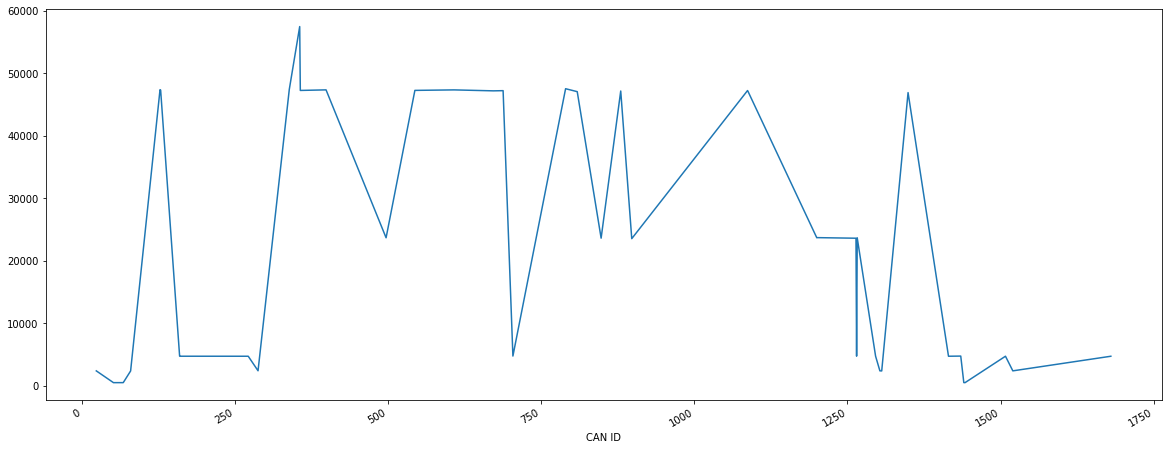

In [9]:
idcounts.plot()
fig = plt.gcf()
fig.set_size_inches(20,8)
fig.autofmt_xdate()

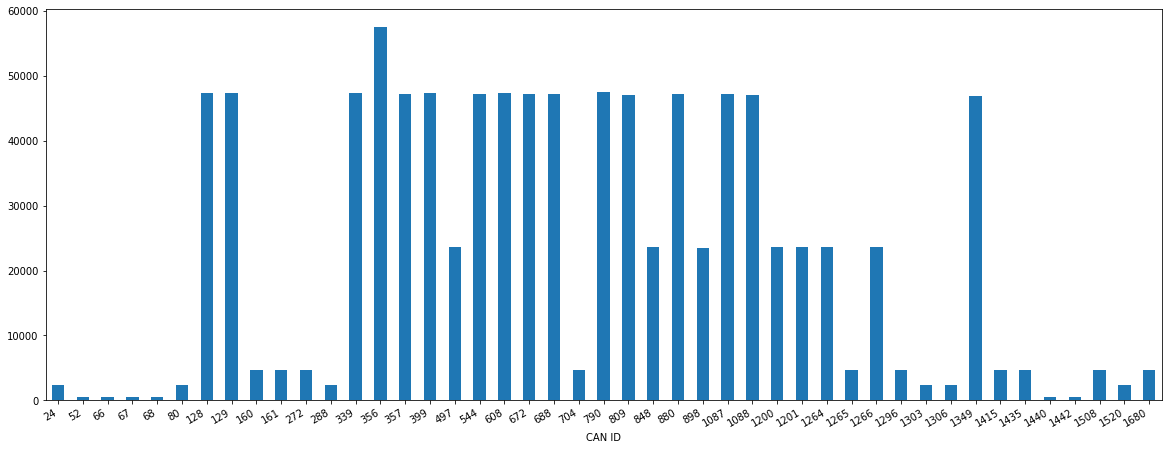

In [10]:
idcounts.plot.bar()
fig = plt.gcf()
fig.set_size_inches(20,8)
fig.autofmt_xdate()

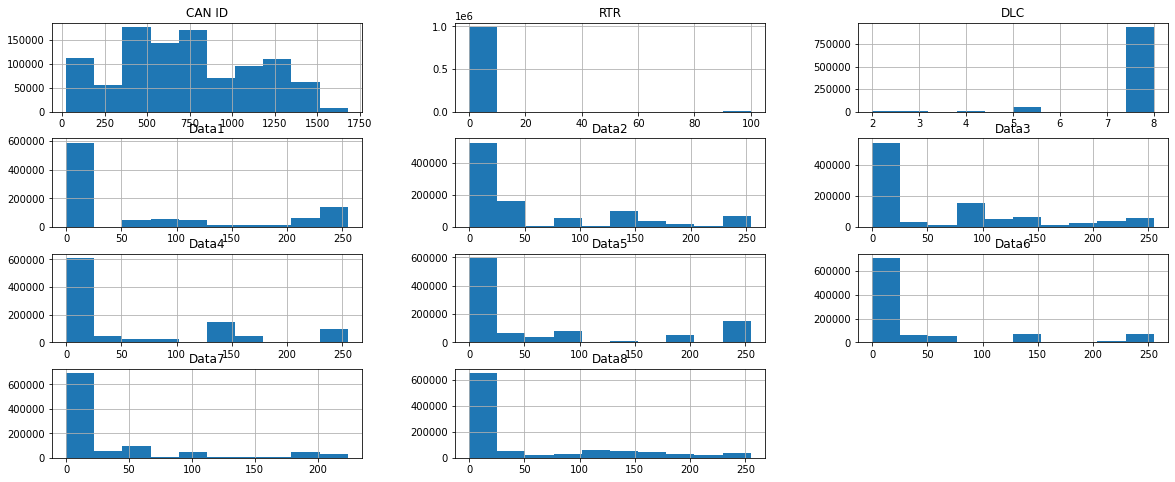

In [11]:
df.hist()
fig = plt.gcf()
fig.set_size_inches(20,8)

In [32]:
datafield = df[['Data1','Data2','Data3','Data4','Data5','Data6','Data7','Data8']]
datafield['sum'] = df.loc[:,['Data1','Data2','Data3','Data4','Data5','Data6','Data7','Data8']].sum(axis=1)
datafield

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,sum
Timestamp,,,,,,,,,
1.481193e+09,0,0,0,0,0,0,0,1,1
1.481193e+09,5,28,106,10,28,19,0,127,323
1.481193e+09,0,33,28,0,0,67,0,0,128
1.481193e+09,5,28,0,48,255,147,99,53,635
1.481193e+09,0,23,106,10,28,19,28,31,245
...,...,...,...,...,...,...,...,...,...
1.481193e+09,0,2,0,0,0,0,0,0,2
1.481193e+09,0,128,16,255,0,255,160,46,860
1.481193e+09,14,216,127,0,0,0,3,170,530


## Checking unique values( possible values of datapoints)

In [12]:
devids = df['CAN ID'].unique()
len(devids),devids

(45, array([1415,  790,  399,  608,  128,  129,  672,  809,  898, 1201,  356,
         880, 1087, 1088, 1266,  272, 1264, 1349,  160,  161,  339,  497,
         544,  357,  688,  704, 1200,   80,  848,   24, 1265, 1306, 1680,
        1508, 1435, 1296,  288, 1303,   66,   67,   68, 1520, 1440, 1442,
          52]))

In [13]:
df['RTR'].unique()

array([  0, 100])

In [14]:
df['DLC'].unique()

array([8, 5, 4, 3, 2])

## Exploring Types of frames: Data Frames and Remote Frames

In [15]:
dataframes = df.loc[df.RTR == 100]
remoteframes = df.loc[df.RTR != 100]

In [16]:
remoteframes.head()

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
1.481193e+09,1415,0,8,0,0,0,0,0,0,0,1
1.481193e+09,790,0,8,5,28,106,10,28,19,0,127
1.481193e+09,399,0,8,0,33,28,0,0,67,0,0
1.481193e+09,608,0,8,5,28,0,48,255,147,99,53
1.481193e+09,128,0,8,0,23,106,10,28,19,28,31


In [17]:
remoteframes['RTR'].unique()

array([0])

In [19]:
impattackframes = df.loc[df['CAN ID'] == 356]
impattackframes

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
1.481193e+09,356,0,8,0,8,0,0,0,0,5,13
1.481193e+09,356,0,8,0,8,0,0,0,0,6,14
1.481193e+09,356,0,8,0,8,0,0,0,0,7,15
1.481193e+09,356,0,8,0,8,0,0,0,0,8,0
1.481193e+09,356,0,8,0,8,0,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...
1.481193e+09,356,0,8,0,8,0,0,0,0,0,8
1.481193e+09,356,0,8,0,8,0,0,0,0,1,9
1.481193e+09,356,0,8,0,8,0,0,0,0,2,10


In this dataset, a malicious impostor node is added to the network, which randomly chooses a CAN ID after observing network traffic, in this case (ID=356) and then responds to remote frames addressed to it.
It also broadcasts random dataframes and instructions to other nodes. The original node also keeps broadcasting, so there's definitely some confusion caused in the network due to this attack.

So some of the above packets are authentic, some are from the impostor node. 

In [22]:
dataframes

,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
Timestamp,,,,,,,,,,,
1.481193e+09,356,100,8,1,2,3,4,5,6,7,8
1.481193e+09,356,100,8,1,2,3,4,5,6,7,8
1.481193e+09,356,100,8,1,2,3,4,5,6,7,8
1.481193e+09,356,100,8,1,2,3,4,5,6,7,8
1.481193e+09,356,100,8,1,2,3,4,5,6,7,8
...,...,...,...,...,...,...,...,...,...,...,...
1.481193e+09,356,100,8,1,2,3,4,5,6,7,8
1.481193e+09,356,100,8,1,2,3,4,5,6,7,8
1.481193e+09,356,100,8,1,2,3,4,5,6,7,8


In [21]:
dataframes['CAN ID'].unique()

array([356])

That's interesting, all the data packets in this dataset are broadcasted from one ID. This interesting pattern may allow us to label these packets as anomalies to be used for unsupervised learning. 



# Conclusion

One of the conclusions we see from here is that all these attack datasets offer noticable and labellable packets that can be used for supervised training. Stand alone, each does not seem to be good enough to train and test a model, lacking a complete unbiased picture of both a normal network and a network under attack. The DoS dataset is evenly split with malacious packets and normal packets 50:50, the Impersonation Dataset contains dataframes that are  


In this light, it makes sense to combine each with the Attack-Free dataset to get a slightly balanced image of the network.

We'll try to experiment with :
* Attack-free + DoS,
* Attack-free + Impersonation

and so on.

